In [ ]:
# Project to analyze the effect of covid19 on Airbnb.


In [1]:
# Importing libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import missingno as msno

In [2]:
# Covid19 Dataframe

dfcvd = pd.read_csv('https://raw.githubusercontent.com/amruthsrepo/ITCS-6162_KDD_project/main/Covid%20Data/us-counties.csv')

dfcvd.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [ ]:
dfcvd.columns

Index(['date', 'county', 'state', 'fips', 'cases', 'deaths'], dtype='object')

In [3]:
# Filtering data by states. Taken data for California, Newyork, Colorado, Florida, Massachusetts, Texas and Illinois

county = ['New York City','Los Angeles','Broward','Austin','Cook','Suffolk','Denver']
df2cvd = dfcvd[dfcvd['county'].isin(county)]
df2cvd['date'] = pd.to_datetime(df2cvd['date'])

/var/folders/bl/j3c80pt16059vmkvyn28nwzdff4dj0/T/ipykernel_54676/1249349492.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2cvd['date'] = pd.to_datetime(df2cvd['date'])


In [6]:
df2cvd.head()

,date,county,state,fips,cases,deaths
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
6,2020-01-25,Cook,Illinois,17031.0,1,0.0
9,2020-01-26,Los Angeles,California,6037.0,1,0.0
11,2020-01-26,Cook,Illinois,17031.0,1,0.0
14,2020-01-27,Los Angeles,California,6037.0,1,0.0


<AxesSubplot:>

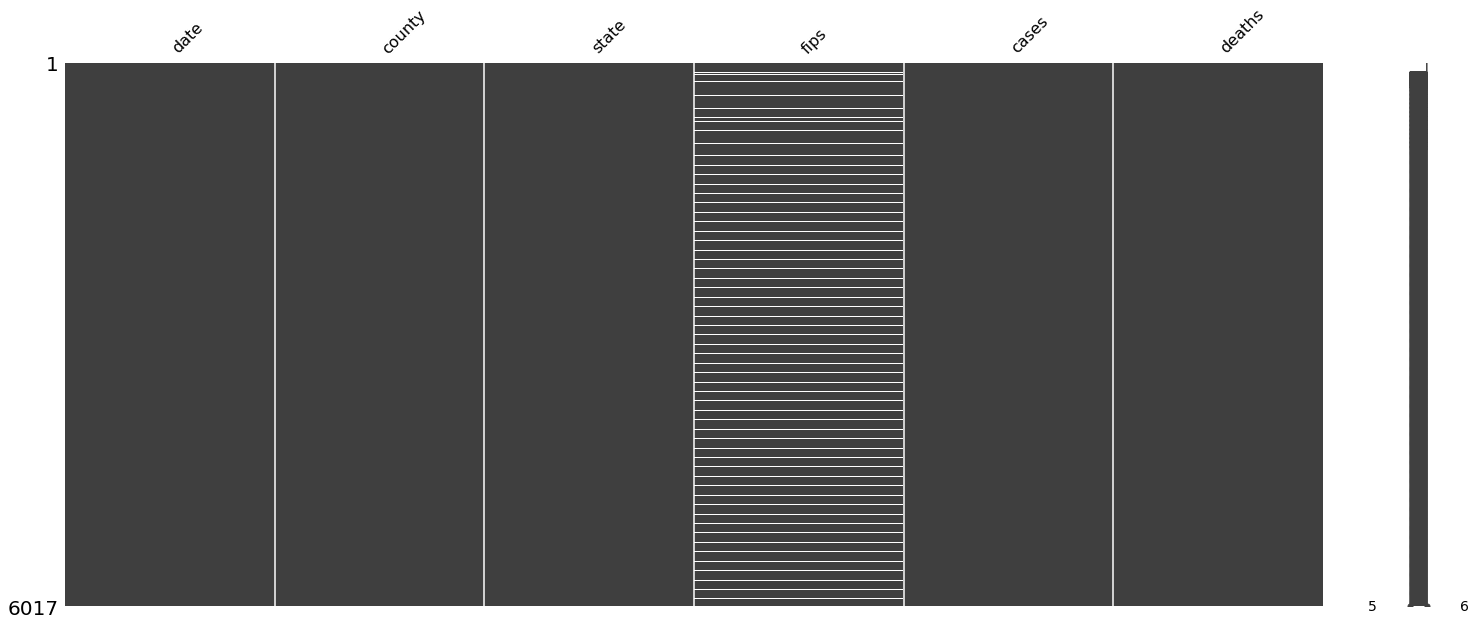

In [7]:
# Using nullity matrix to select most complete columns
msno.matrix(df2cvd)

In [4]:
# Selecting date, state, death, positive and negative columns.

df2cvd = df2cvd.drop(['fips'], axis=1)
df2cvd.head()

,date,county,state,cases,deaths
3,2020-01-24,Cook,Illinois,1,0.0
6,2020-01-25,Cook,Illinois,1,0.0
9,2020-01-26,Los Angeles,California,1,0.0
11,2020-01-26,Cook,Illinois,1,0.0
14,2020-01-27,Los Angeles,California,1,0.0


In [5]:
# Now taking Airbnb data for California, Newyork, Colorado, Florida, Massachusetts, Texas and Illinois

countyFilesList = ['Austin', 'Broward', 'Cook', 'Denver', 'LosAngeles', 'NewYorkCity', 'Suffolk']
statesFilesList = ['Texas', 'Florida', 'Illinois', 'Colorado', 'California', 'New York', 'Massachusetts']
salesCountByCounty = {}
salesCountByCountyPreCovid = {}
dateByYear = ['2017-01-01','2018-01-01','2019-01-01','2020-01-01']
for c in countyFilesList:
  dfCounty = pd.read_csv('https://raw.githubusercontent.com/amruthsrepo/ITCS-6162_KDD_project/main/Airbnb%20Data/'+c+'_reviews.csv')
  dfCounty['dateConverted'] = pd.to_datetime(dfCounty['date'])
  dfCountyPreCovid = dfCounty[dfCounty['dateConverted'] <= '2020-01-01']
  dfCountyPreCovid = dfCountyPreCovid[dfCountyPreCovid['dateConverted'] > '2017-01-01']
  dfCountyPreCovid = pd.DataFrame(dfCountyPreCovid['dateConverted'].value_counts())
  dfCountyPreCovid['date'] = dfCountyPreCovid.index
  dfCountyPreCovid['date'] = pd.to_datetime(dfCountyPreCovid['date'])
  dfCountyPreCovid = dfCountyPreCovid.sort_values(by='date', ascending=True)
  dfCountyPreCovid = dfCountyPreCovid.rename(columns={'date':'date','dateConverted':'sales'})
  salesCountByCountyPreCovid[c] = dfCountyPreCovid
  dfCounty = dfCounty[dfCounty['dateConverted'] > '2020-01-01']
  dfCountyCount = dfCounty['dateConverted'].value_counts()
  salesCountByCounty[c] = dfCountyCount


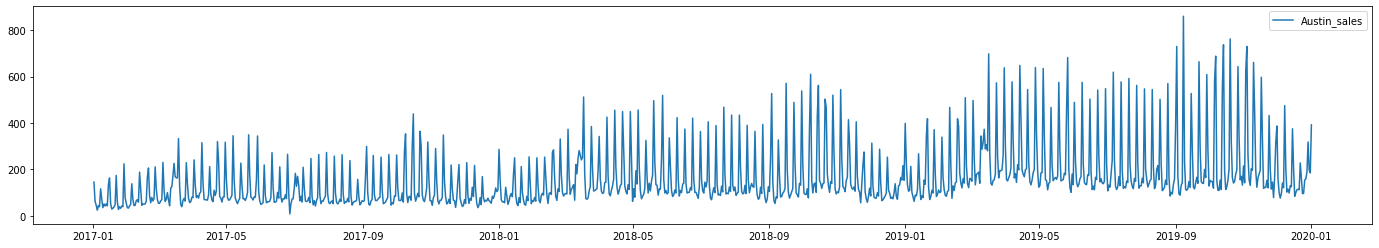

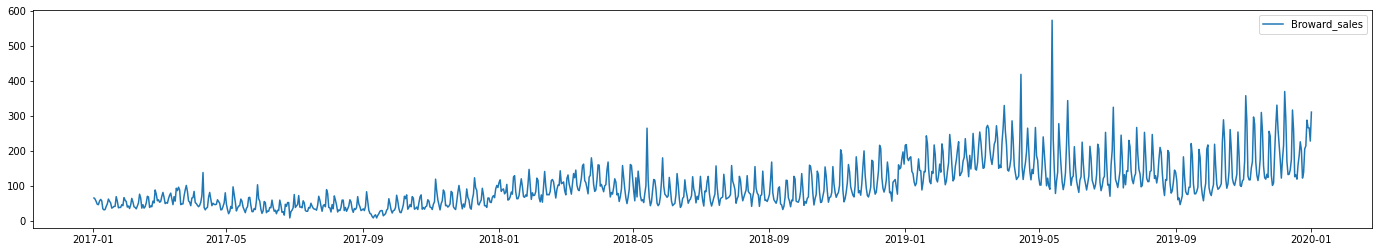

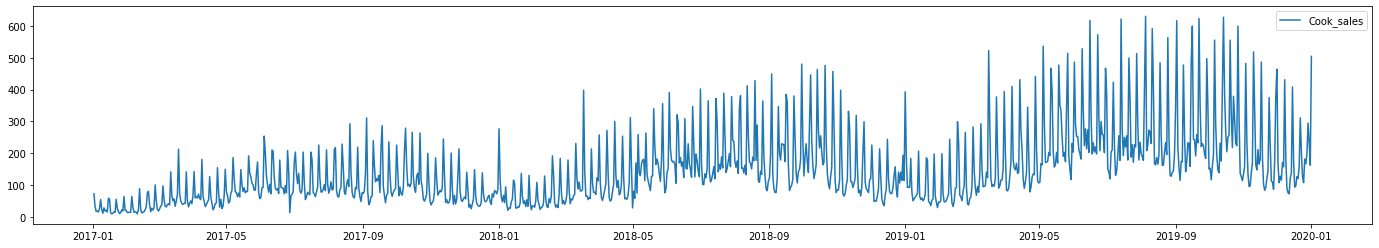

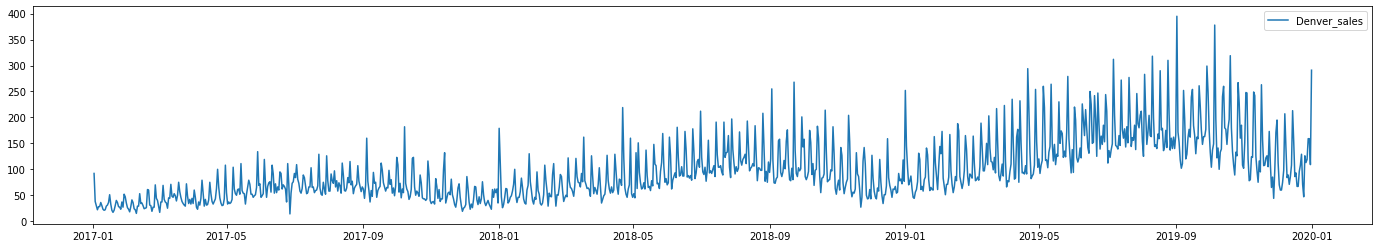

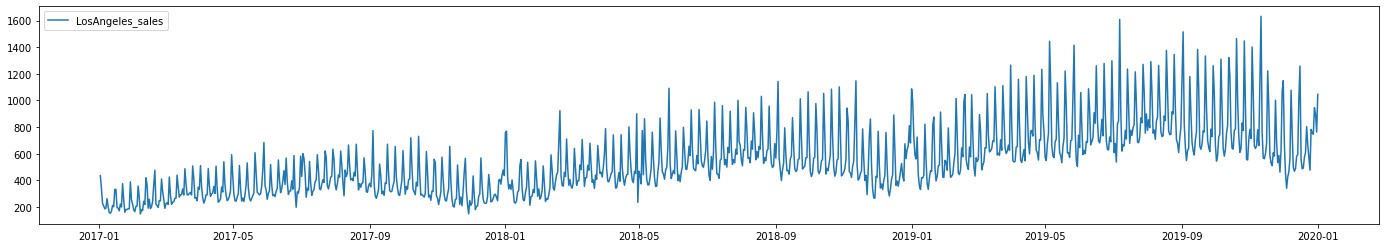

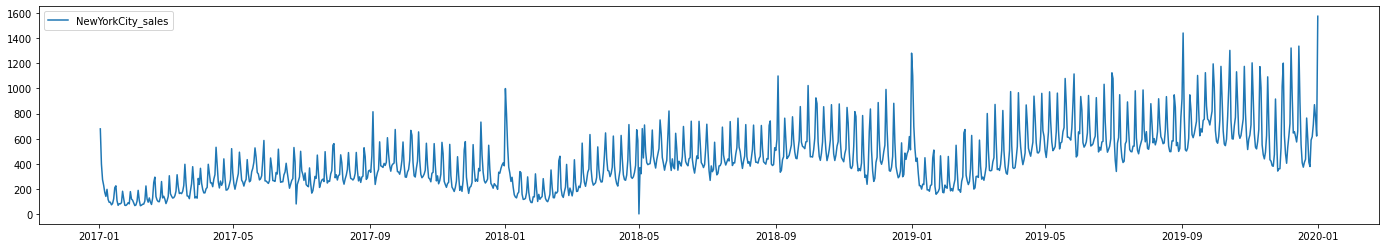

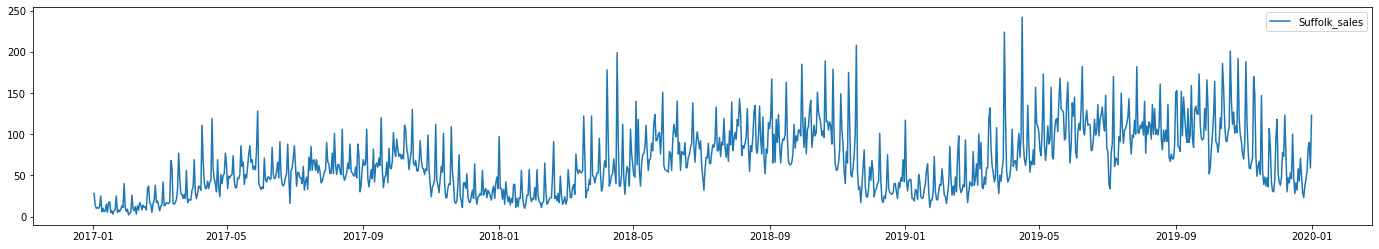

In [15]:
# Visualizing AirBnb sales Pre-Covid
dfSalesCountByCountyPreCovid = {}
for c in countyFilesList:
  f = plt.figure()
  f.set_figwidth(24)
  plt.plot(salesCountByCountyPreCovid[c]['date'],salesCountByCountyPreCovid[c]['sales'],label = c+'_sales')
  plt.legend()
  plt.show()

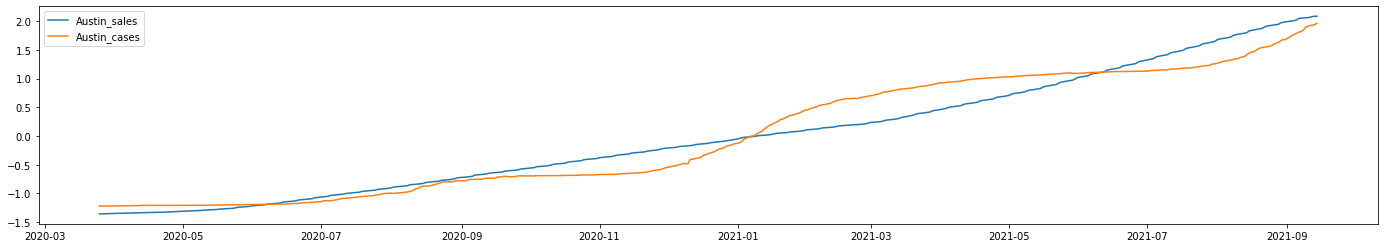

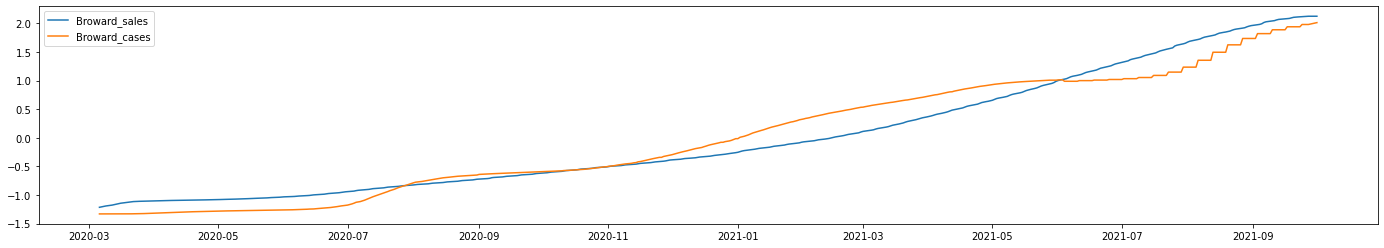

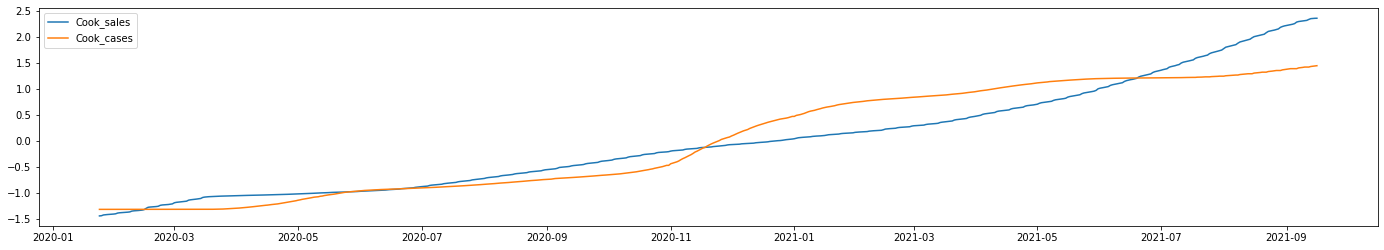

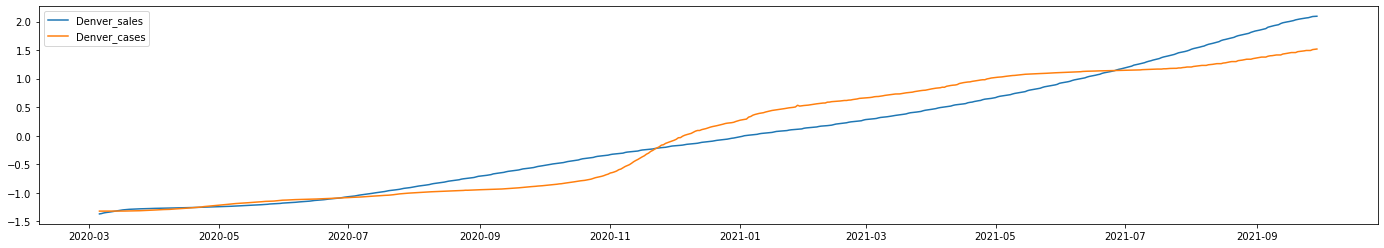

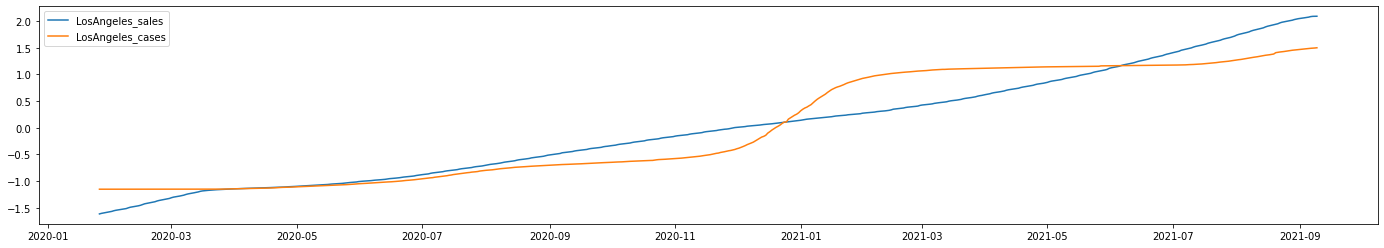

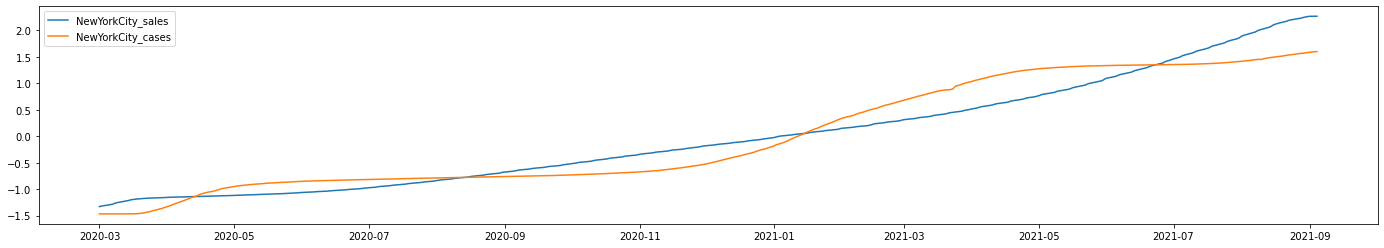

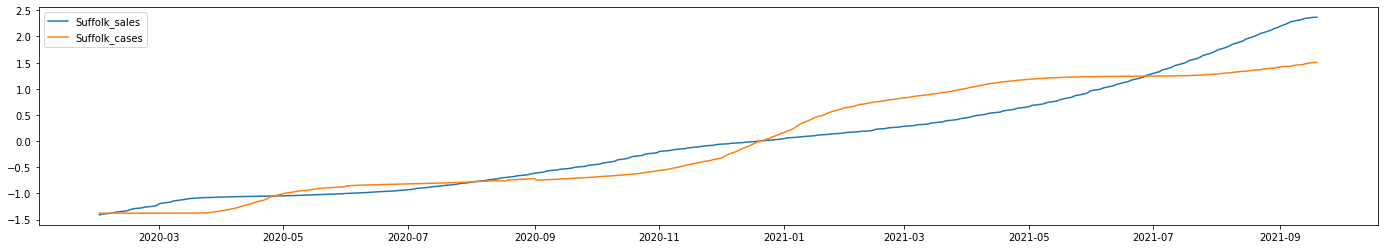

In [9]:
countyFilesList = ['Austin', 'Broward', 'Cook', 'Denver', 'LosAngeles', 'NewYorkCity', 'Suffolk']
statesFilesList = ['Texas', 'Florida', 'Illinois', 'Colorado', 'California', 'New York', 'Massachusetts']
cobmined_dataframes = {}
for c in zip(countyFilesList,statesFilesList):
  countyName = c[0] if c[0] != 'NewYorkCity' else 'New York City'
  countyName = countyName if c[0] != 'LosAngeles' else 'Los Angeles'
  df_covid = df2cvd[df2cvd['county'] == countyName]
  df_covid = df_covid[df_covid['state'] == c[1]]
  df_airbnb = pd.DataFrame(salesCountByCounty[c[0]])
  df_airbnb['date'] = df_airbnb.index
  df_airbnb['date'] = pd.to_datetime(df_airbnb['date'])
  df_airbnb = df_airbnb.sort_values(by='date', ascending=True)
  df_airbnb = df_airbnb.rename(columns={'date':'date','dateConverted':'sales'})
  df_combined = pd.merge(df_airbnb, df_covid, on='date', how='outer')
  df_combined.dropna(how='any', inplace=True)
  cobmined_dataframes[c[0]] = df_combined
  f = plt.figure()
  f.set_figwidth(24)
  plt.plot(df_combined['date'],scale(df_combined['sales'].cumsum()),label = c[0]+'_sales')
  plt.plot(df_combined['date'],scale(df_combined['cases']),label = c[0]+'_cases')
  plt.legend()
  plt.show()


In [ ]:
Austin Sales vs Cases :


From April 2020 sales are decreasing and Covid19 cases are increasing as this the first wave of Covid19 and most of the world is in lock down.
Second wave is completed some where in October and the sales are increasing at faster pace.After that in January 2021 cases started increasing due to holiday season and new variants of virus started infecting more people and sales are decreasing from january.
From May 2021 till July  , most of the people who are already vaccinated and which intiated the sales raise .After July 2021 still new varients from other countires are spreading so cases are increasing and as there are less lockdown norms sales also increasing.


Broward Sales vs Cases :
From April 2020 sales are decreasing and Covid19 cases are increasing as this the first wave of Covid19 and most of the world is in lock down.
From June 2020  covid cases are in decreasing trend and sales are in increasing trend and once vaccine is avilable  to people we see a drastic fall in cases in Broward.
After July 2021 still new variants from other countries are spreading so cases are increasing and as there are less lockdown norms sales also increasing.


Cook County sales vs Cases :

From April 2020 sales are decreasing and Covid19 cases are increasing as this the first wave of Covid19 and most of the world is in lock down.
Covid19 cases are in increasing trend till second wave was completed , after second wave completed from November cases are decreasing and sales are increasing. Once roll out of vaccine drastic decreading on covid cases.
After July 2021 still new variants from other countries are spreading so cases are increasing and as there are less lockdown norms sales also increasing.


Denver sales vs cases:

From April 2020 sales are decreasing and Covid19 cases are increasing as this the first wave of Covid19 and most of the world is in lock down.
the decrease in Covid19 trend after Nov 2020 is due to more restrictions in Colorado city and it's counties which make the fall of Covid19 cases.
After July 2021 still new variants from other countries are spreading so cases are increasing and as there are less lockdown norms sales also increasing.


New York  sales vs Cases :

From April 2020 sales are decreasing and Covid19 cases are increasing as this the first wave of Covid19 and most of the world is in lock down. From April 2020 sales are increasing as cases are un decreasing trend. After September cases started increasing where  sales started decreasing due to schools reopening  and election campaign in the Newyork city.
After July 2021 still new varients from other countires are spreading so cases are increasing and as there are less lockdown norms sales also increasing.



Los Angles sales vs Cases:

The cases are in constant increase trend till whole year 202 due to elections first wave , second wave and sales are on constant decrease trend. Once vaccine is rolled out cases are stalized and sales are increased. After July 2021 still new varients from other countires are spreading so cases are increasing and as there are less lockdown norms sales also increasing.

Sufflock sales vs cases: 

    
The cases incresed in first wave and for some time after first wave cases decreased , once second wave started and due  election campigne cases increased. Vaccine roll out helped the sales to some extentend After July 2021 still new varients from other countires are spreading so cases are increasing and as there are less lockdown norms sales also increasing.



In [59]:
# Combining pre and post Covid data for regression
df_pre_plus_post = {}
for c in countyFilesList:
    df_full = cobmined_dataframes[c].copy()
    df_full = df_full.append(salesCountByCountyPreCovid[c], ignore_index=True)
    df_full.reset_index(drop=True, inplace=True)
    df_full['date'] = pd.to_datetime(df_full['date'])
    df_full = df_full.sort_values(by='date', ascending=True)
    df_full.county.fillna(df_full.county.iloc[-1], inplace = True)
    df_full.state.fillna(df_full.state.iloc[-1], inplace = True)
    df_full.fillna(0, inplace = True)
    df_full.shape
    df_pre_plus_post[c] = df_full